In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None) #show all columns

In [3]:
df=pd.read_excel('Canada.xlsx',skiprows=20,
skipfooter=2,sheet_name='Canada by Citizenship')

## Preprocessing

In [4]:
cols_to_drop=['Type','Coverage','AREA','REG','DEV'] #list of unwanted cols
df.drop(columns=cols_to_drop,inplace=True)          # dropping the columns
years=range(1980,2014)                              # list of year 1980 2013
df.rename({            
    'OdName':'Country',
    'AreaName' : 'Continent',
    'Regname':'Region',
    'DevName':'Status'
},axis=1,inplace=True)                # remaning the columns to our prefernces
df.set_index('Country',inplace=True)  # making country as index as each country is unique for
df['Total']=df[years].sum(axis=1)     # adding a new columns from existing data
df.head(3)                            

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [5]:
df.sort_values(by='Total',inplace=True,ascending=False)
df.head(10)

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [6]:
df.rename({'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)

<AxesSubplot: title={'center': 'Top 10 countries'}, ylabel='Total'>

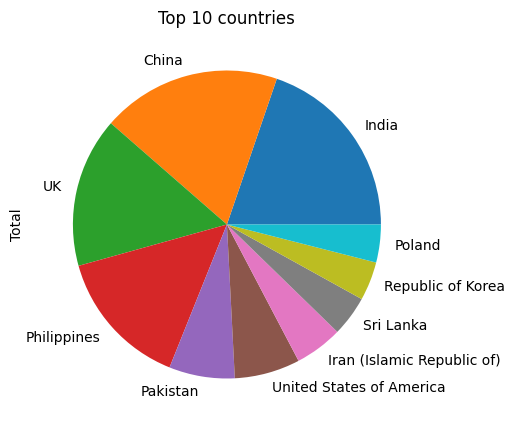

In [7]:
df.head(10)['Total'].plot(kind='pie',figsize=(15,5),title='Top 10 countries')

<AxesSubplot: title={'center': 'Top 10 countries'}, xlabel='Country'>

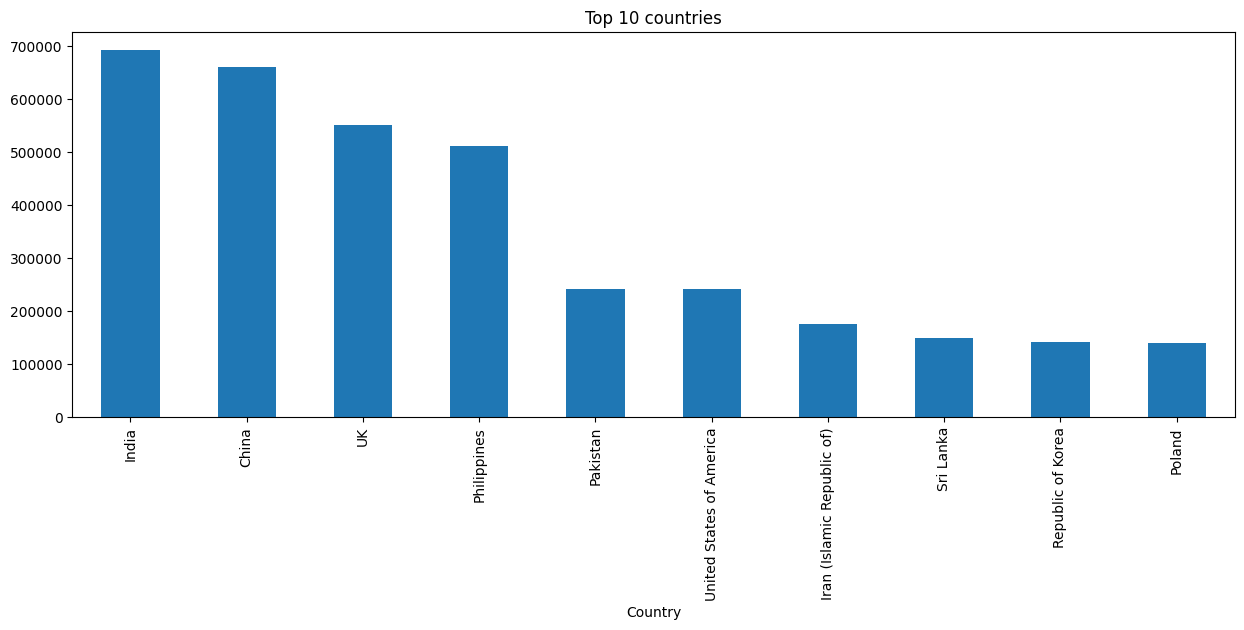

In [8]:
df.head(10)['Total'].plot(kind='bar',figsize=(15,5),title='Top 10 countries')

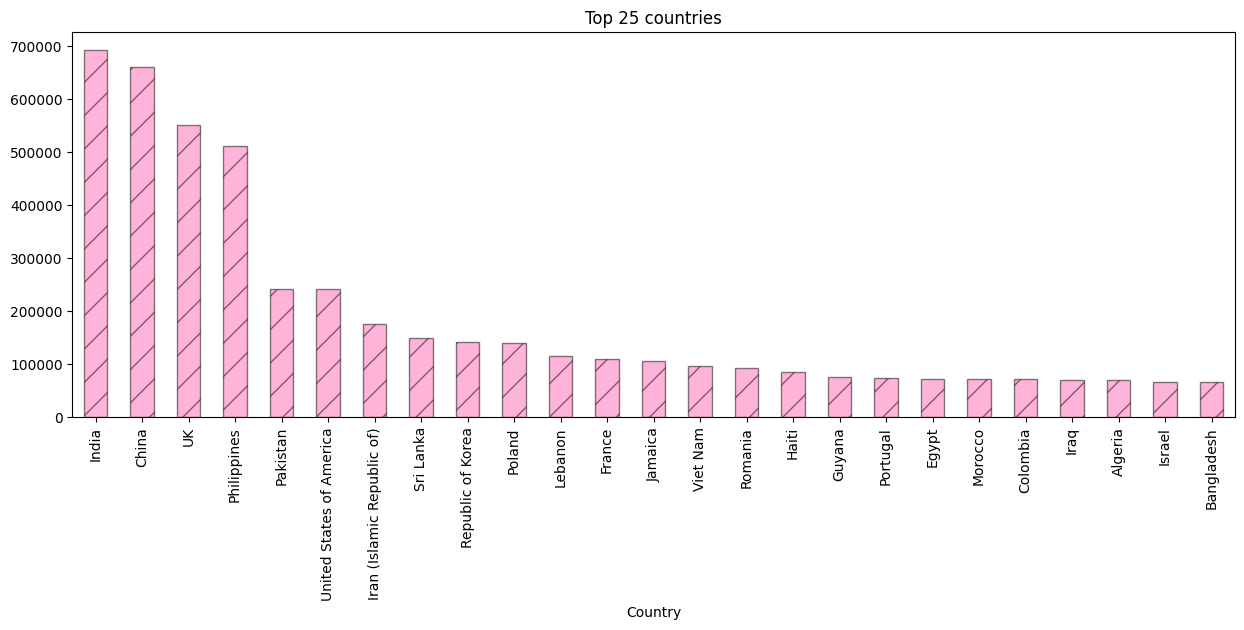

In [9]:
df.head(25)['Total'].plot(kind='bar',figsize=(15,5),title='Top 25 countries',
color='hotpink',alpha=.5,edgecolor='black',hatch='/')
plt.savefig('Top 25 countries with immigration.jpg',bbox_inches='tight')

In [10]:
# how to view all setting of plot
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000023AA3699A30>
File:           c:\users\ansar\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot

In [11]:
# compare India,UK,China immigration
countries= ['India','China','UK']
df.loc[countries,years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
UK,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827


<AxesSubplot: >

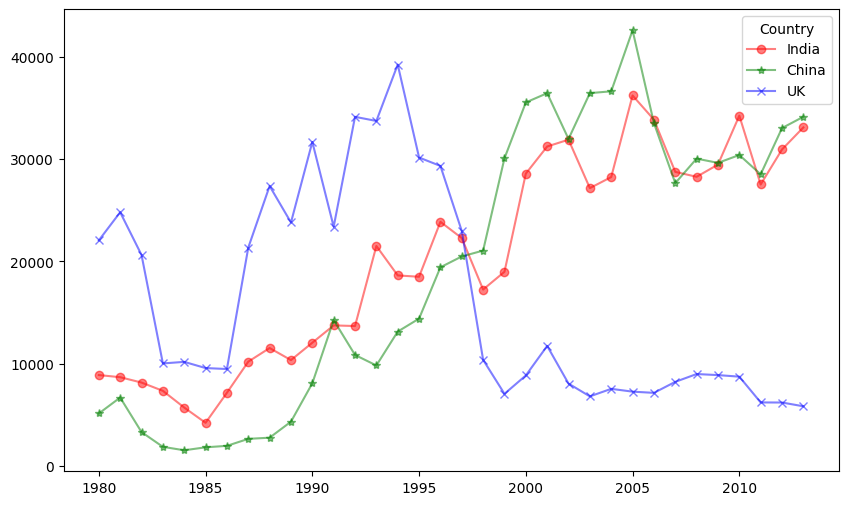

In [12]:
df.loc[countries,years].T.plot(kind='line',figsize=(10,6),
style=['ro-','g*-','bx-'],alpha=.5)

In [13]:
px.funnel(df.head(),x=df.head().index,y=[1980,1990,2000,2010])

In [14]:
df

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2


# Line plots

In [15]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<AxesSubplot: title={'center': 'Immigration Trends of Japan to Canada (1980-2013)'}, xlabel='years', ylabel='No. of People'>

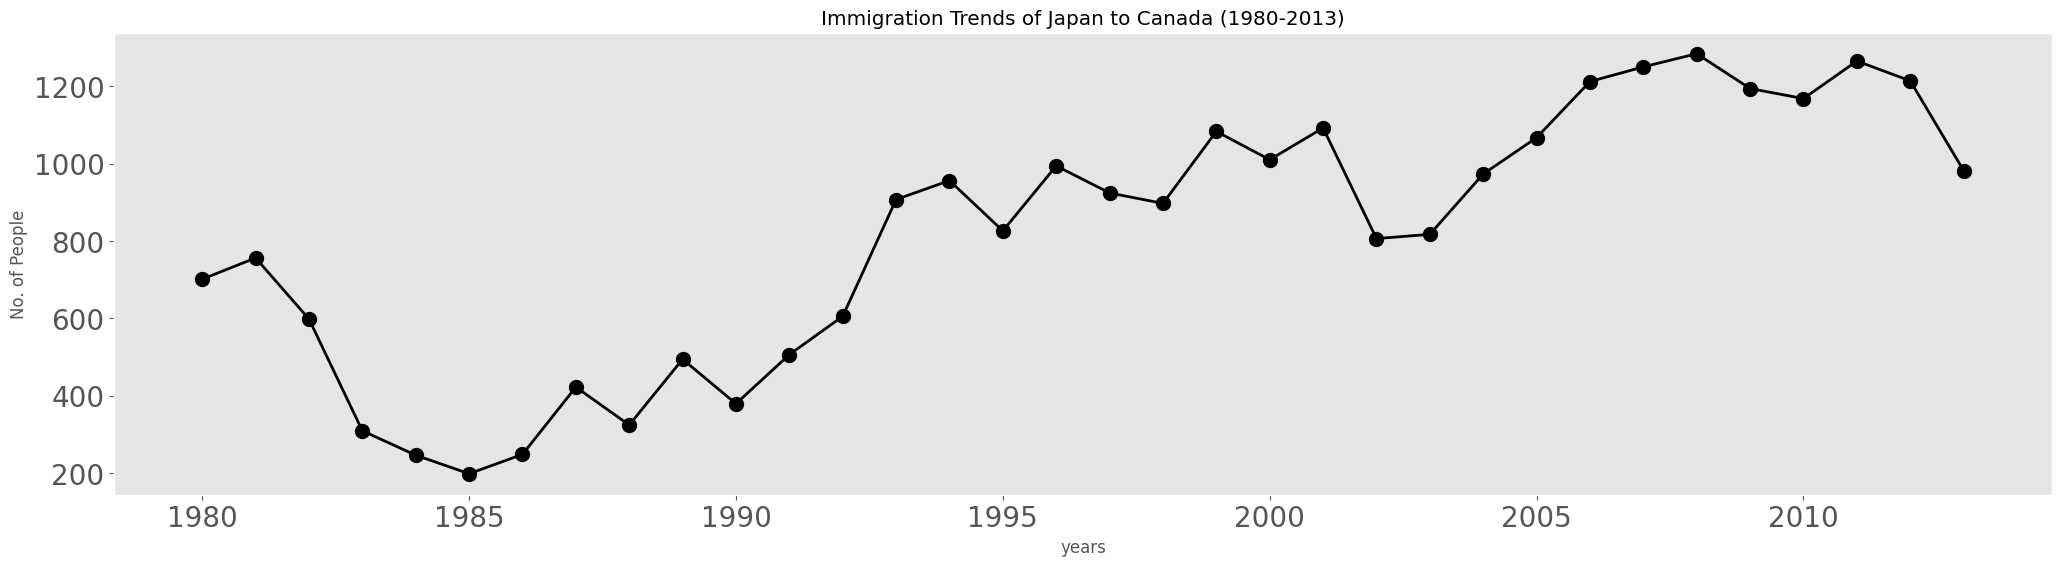

In [16]:
df.loc['Japan',years].plot(linewidth=2,color='black',linestyle='solid',marker='o',markersize=10,
    figsize=(25,6),xlabel='years' ,ylabel='No. of People',fontsize=20,
    grid=False,title='Immigration Trends of Japan to Canada (1980-2013)')

<AxesSubplot: title={'center': 'Immigration Trends of Japan to Canada (1980-2013)'}, xlabel='years', ylabel='No. of People'>

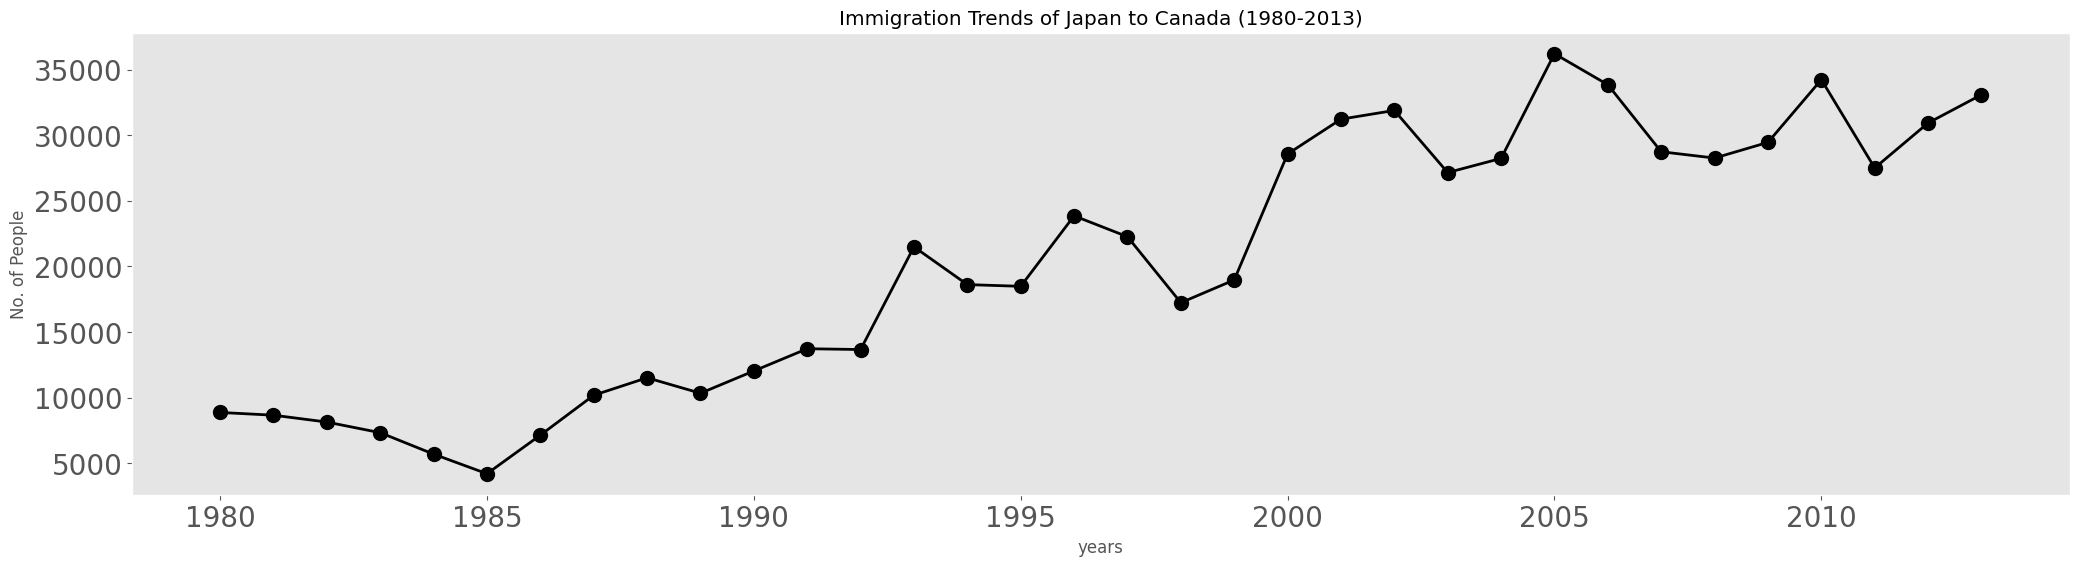

In [17]:
df.loc['India',years].plot(linewidth=2,color='black',linestyle='solid',marker='o',markersize=10,
    figsize=(25,6),xlabel='years' ,ylabel='No. of People',fontsize=20,
    grid=False,title='Immigration Trends of Japan to Canada (1980-2013)')

# area plots

<AxesSubplot: >

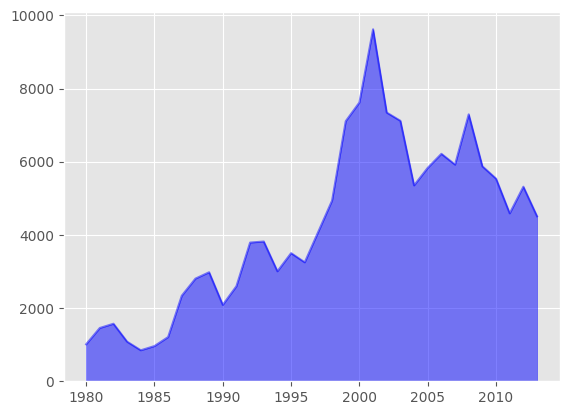

In [18]:
df.loc['Republic of Korea',years].plot(kind='area',alpha=.5,color='blue')

<AxesSubplot: >

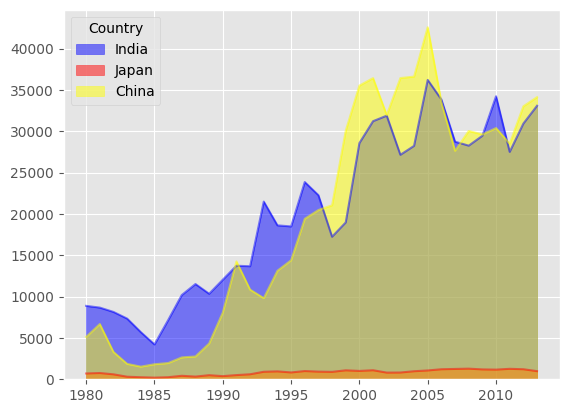

In [19]:
countries=['India','Japan','China']
colors=['blue','red','yellow']
df.loc[countries,years].T.plot(kind='area',alpha=.5,color=colors,stacked=False)

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

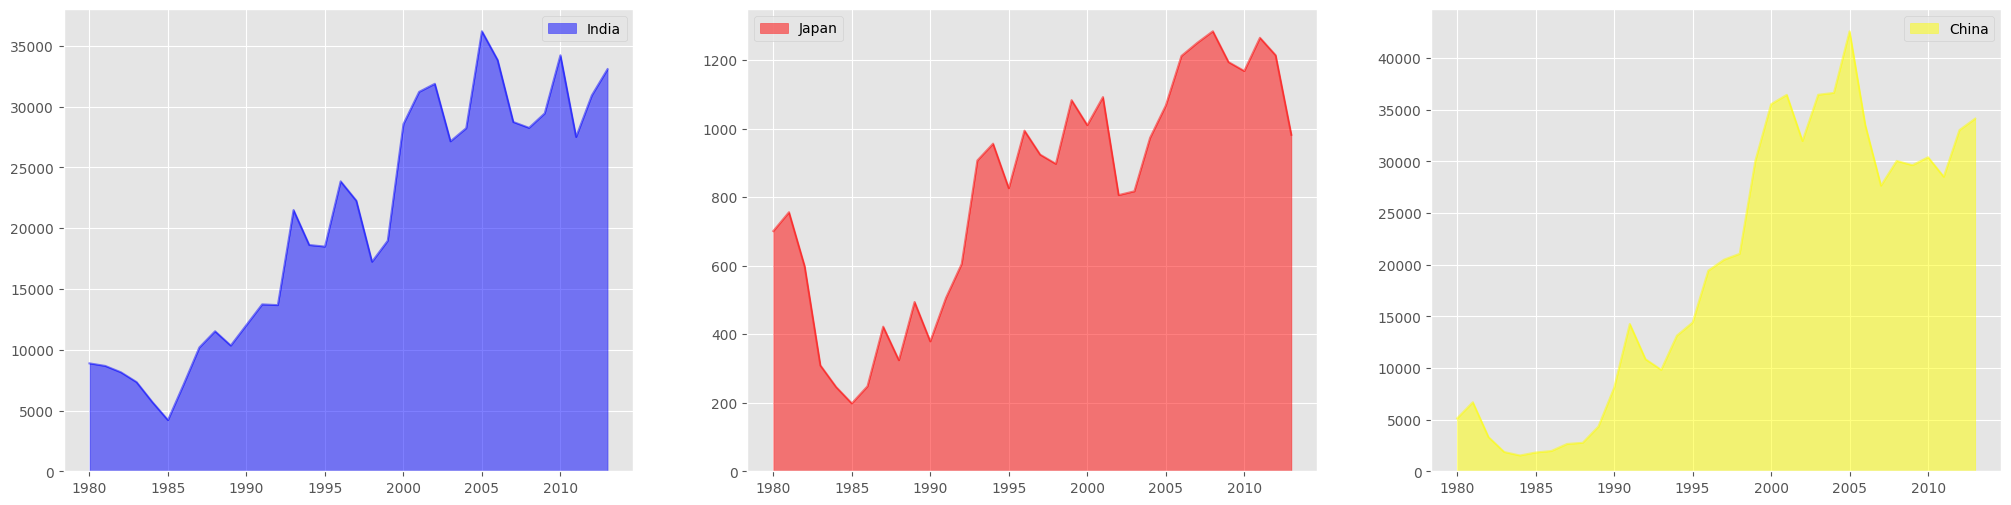

In [20]:
df.loc[countries,years].T.plot(kind='area',alpha=.5,color=colors,stacked=False,
    subplots=True,figsize=(25,6),layout=(1,3))

In [21]:
df.head()

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


# pie chart

<AxesSubplot: ylabel='India'>

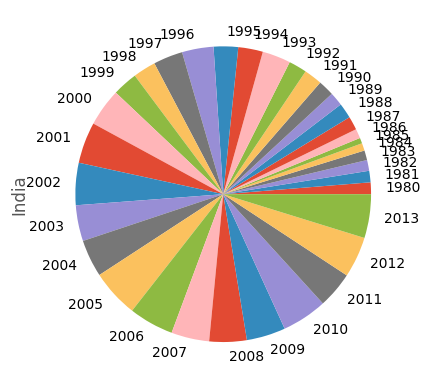

In [22]:
df.loc['India',years].plot(kind="pie")

<AxesSubplot: ylabel='Total'>

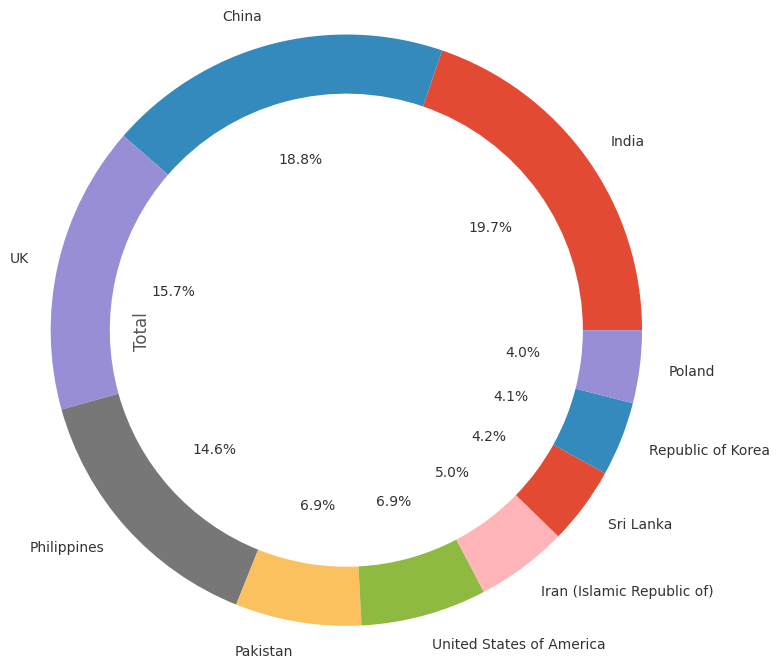

In [23]:

df['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

In [24]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Northern America',
       'Latin America and the Caribbean', 'Africa', 'Oceania'],
      dtype=object)

# filter

<AxesSubplot: ylabel='Total'>

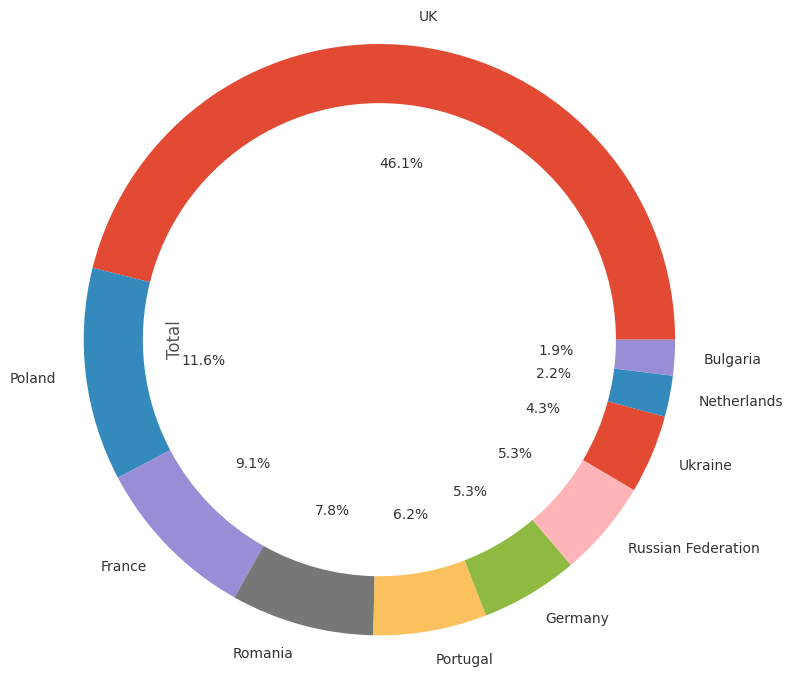

In [25]:
df[df['Continent']=='Europe']['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

# top 10 countries with immigration with status =='developed'

<AxesSubplot: ylabel='Total'>

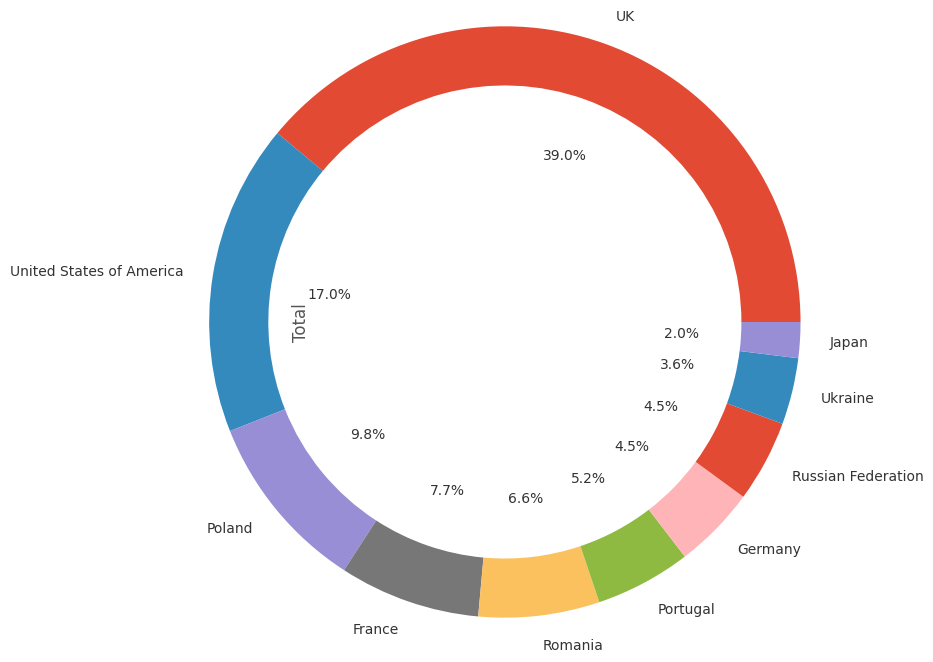

In [26]:
df[df['Status']=='Developed regions']['Total'].head(10).plot(kind='pie',radius=2,
   autopct="%.1f%%",wedgeprops={"width":.4},textprops={'color':'#333'})

## groupby

In [27]:
cdf=df.groupby(by='Continent')[list(years)].sum()
cdf

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [28]:
df

,Continent,RegName,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2


In [29]:
df.groupby(by='Continent')[list(years)].agg([max,min])

1980       1981       1982       1983      \
                                   max min    max min    max min    max min   
Continent                                                                     
Africa                            1026   0   1118   0    781   0    474   0   
Asia                              8880   0   8670   0   8147   0   7338   0   
Europe                           22045   0  24796   0  20620   0  10015   0   
Latin America and the Caribbean   3198   0   3692   0   3575   0   2860   0   
Northern America                  9378   0  10030   0   9074   0   7100   0   
Oceania                            702   0    705   0    814   0    554   0   

                                  1984      1985      1986       1987      \
                                   max min   max min   max min    max min   
Continent                                                                   
Africa                             473   0   460   0   718   0   1470   0   
Asia                              7583   0  5907   0  7150   0  10189   0   
Europe                           10170   0  9564   0  9470   0  21337   0   
Latin America and the Caribbean   2666   5  2938  16  4649   7   6174  18   
Northern America                  6661   0  6543   0  7074   0   7705   0   
Oceania                            389   0   446   0   361   0    523   0   

                                  1988       1989       1990       1991      \
                                   max min    max min    max min    max min   
Continent                                                                     
Africa                            1305   0   1663   0   2365   0   3266   0   
Asia                             11522   0  11865   0  13568   0  14255   0   
Europe                           27359   0  23795   0  31668   0  23380   0   
Latin America and the Caribbean   3924  16   3946  24   4945  18   7124  13   
Northern America                  6469   0   6790   0   5892   3   6054   3   
Oceania                            561   0    736   0   1172   0   1619   0   

                                  1992       1993       1994       1995      \
                                   max min    max min    max min    max min   
Continent                                                                     
Africa                            5794   0   3734   0   2375   0   2821   0   
Asia                             13673   0  21496   0  19532   0  18489   0   
Europe                           34123   0  33720   0  39231   0  30145   0   
Latin America and the Caribbean   5991  16   6065  20   4181  18   3935  17   
Northern America                  6842   4   7435   3   5901   1   4890   1   
Oceania                           1782   0   1317   0   1016   0    674   0   

                                  1996       1997       1998       1999      \
                                   max min    max min    max min    max min   
Continent                                                                     
Africa                            2561   0   2137   0   2292   0   2389   0   
Asia                             23859   0  22268   0  21049   0  30069   0   
Europe                           29322   0  22965   0  10367   0   7045   0   
Latin America and the Caribbean   3282  18   2847  17   2253  12   2358   9   
Northern America                  5515   1   4753   0   4437   0   5196   0   
Oceania                            699   0    623   0    479   0    523   0   

                                  2000       2001       2002       2003      \
                                   max min    max min    max min    max min   
Continent                                                                     
Africa                            2867   0   4067   0   4174   0   3369   0   
Asia                             35529   1  36434   0  31961   1  36439   0   
Europe                            8840   0  11728   0   8046   0   6797   0   
Latin America and 

In [30]:
df.groupby(by='Continent')[list(years)].agg(['median','mean','count','std'])

1980                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              5.0    73.166667    54   188.752683   
Asia                               12.0   633.163265    49  1661.461911   
Europe                             17.0   924.651163    43  3400.519959   
Latin America and the Caribbean   114.0   396.393939    33   720.936064   
Northern America                 4689.0  4689.000000     2  6631.247394   
Oceania                             0.0   138.714286    14   275.298839   

                                   1981                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              4.5    80.796296    54   215.842831   
Asia                                6.0   700.285714    49  1744.233272   
Europe                             20.0  1041.906977    43  3804.699987   
Latin America and the Caribbean   117.0   461.060606    33   890.283520   
Northern America                 5015.0  5015.000000     2  7092.281015   
Oceania                             1.0   131.357143    14   262.275723   

                                   1982                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              6.0    70.722222    54   179.364961   
Asia                               16.0   616.612245    49  1467.264743   
Europe                             10.0   993.488372    43  3258.495222   
Latin America and the Caribbean   146.0   508.151515    33   931.359259   
Northern America                 4537.0  4537.000000     2  6416.286932   
Oceania                             0.0   119.642857    14   252.528020   

                                   1983                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              3.5    49.462963    54   112.049301   
Asia                               16.0   504.000000    49  1318.140831   
Europe                              9.0   572.976744    43  1684.401568   
Latin America and the Caribbean   124.0   467.484848    33   841.861446   
Northern America                 3550.0  3550.000000     2  5020.458146   
Oceania                             0.5    72.714286    14   164.784441   

                                   1984                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              6.5    48.870370    54   104.221652   
Asia                                7.0   556.612245    49  1445.529283   
Europe                             11.0   518.302326    43  1638.375437   
Latin America and the Caribbean   142.0   414.484848    33   693.568540   
Northern America                 3330.5  3330.500000     2  4710.038269   
Oceania                             0.5    62.714286    14   131.166617   

                                   1985                                  \
                                 median         mean count          std   
Continent                                                                 
Africa                              4.5    49.074074    54   103.179611   
Asia                               17.0   486.734694    49  1143.511802   
Europe                              6.0   484.744186    43  1518.592599   
Latin America and the Caribbean   165.0   459.727273    33   769.882145   
Northern America                 3271.5  3271.500000     2  4626.599669   
Oceania                             0.0    65.714286   

In [31]:
df.groupby(by='Continent')[list(years)].agg(['median','mean',])

1980                 1981               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                              5.0    73.166667     4.5    80.796296   
Asia                               12.0   633.163265     6.0   700.285714   
Europe                             17.0   924.651163    20.0  1041.906977   
Latin America and the Caribbean   114.0   396.393939   117.0   461.060606   
Northern America                 4689.0  4689.000000  5015.0  5015.000000   
Oceania                             0.0   138.714286     1.0   131.357143   

                                   1982                 1983               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                              6.0    70.722222     3.5    49.462963   
Asia                               16.0   616.612245    16.0   504.000000   
Europe                             10.0   993.488372     9.0   572.976744   
Latin America and the Caribbean   146.0   508.151515   124.0   467.484848   
Northern America                 4537.0  4537.000000  3550.0  3550.000000   
Oceania                             0.0   119.642857     0.5    72.714286   

                                   1984                 1985               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                              6.5    48.870370     4.5    49.074074   
Asia                                7.0   556.612245    17.0   486.734694   
Europe                             11.0   518.302326     6.0   484.744186   
Latin America and the Caribbean   142.0   414.484848   165.0   459.727273   
Northern America                 3330.5  3330.500000  3271.5  3271.500000   
Oceania                             0.5    62.714286     0.0    65.714286   

                                   1986                 1987               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                              7.5    70.037037    16.0   138.777778   
Asia                               13.0   586.510204    16.0   881.693878   
Europe                             11.0   566.744186    11.0  1086.000000   
Latin America and the Caribbean   209.0   641.787879   269.0   862.757576   
Northern America                 3537.0  3537.000000  3852.5  3852.500000   
Oceania                             0.0    64.571429     0.0    85.714286   

                                   1988                 1989               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                             11.5   139.851852    14.0   183.222222   
Asia                               29.0   968.448980    44.0  1229.714286   
Europe                              7.0  1272.697674     8.0  1416.116279   
Latin America and the Caribbean   265.0   664.363636   275.0   759.393939   
Northern America                 3234.5  3234.500000  3395.0  3395.000000   
Oceania                             1.0    84.357143     0.5   109.928571   

                                   1990                 1991               \
                                 median         mean  median         mean   
Continent                                                                   
Africa                             13.5   203.925926    23.0   263.481481   
Asia                               34.0  1486.306122    38.0  1836.000000   
Europe                             14.0  1588.395349    21.0  1347.395349   
Latin America and the Caribbean   327.0   846.727273   517.0  1115.969697   
Northern America          

# Histogram

<AxesSubplot: ylabel='Frequency'>

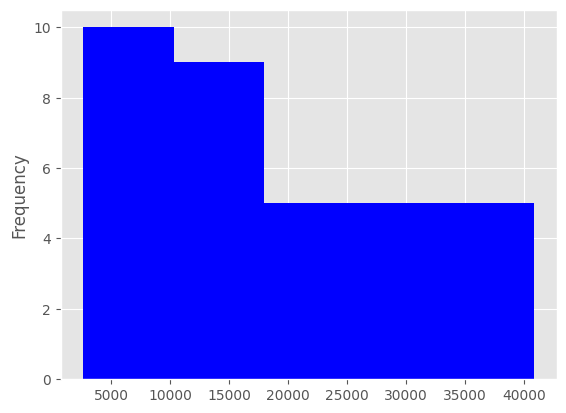

In [32]:
cdf.loc['Africa',years].plot(kind='hist',bins=5,color='blue')

<AxesSubplot: ylabel='Frequency'>

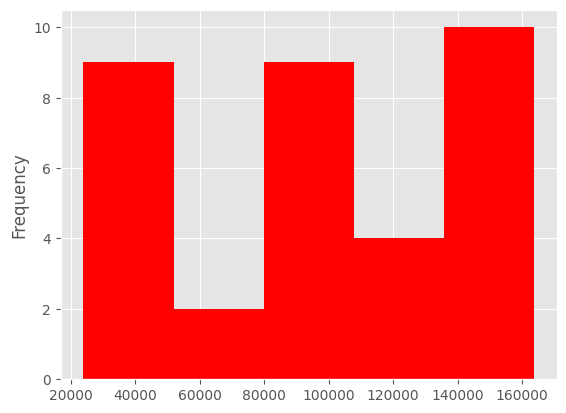

In [33]:
cdf.loc['Asia',years].plot(kind='hist',bins=5,color='red')

<AxesSubplot: ylabel='Density'>

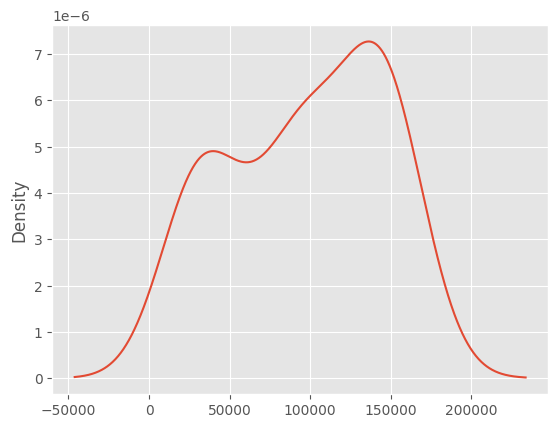

In [34]:
cdf.loc['Asia',years].plot(kind='kde')

<AxesSubplot: ylabel='Density'>

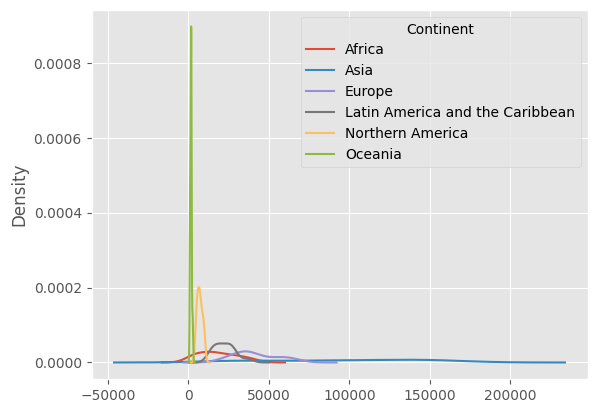

In [35]:
cdf[years].T.plot(kind='kde')

## box plot

<AxesSubplot: >

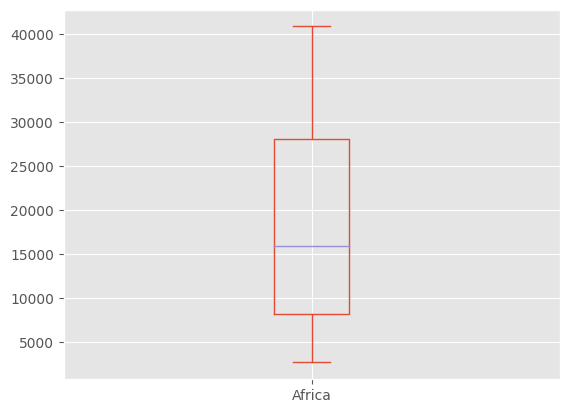

In [36]:
cdf.loc['Africa',years].plot(kind='box')

<AxesSubplot: >

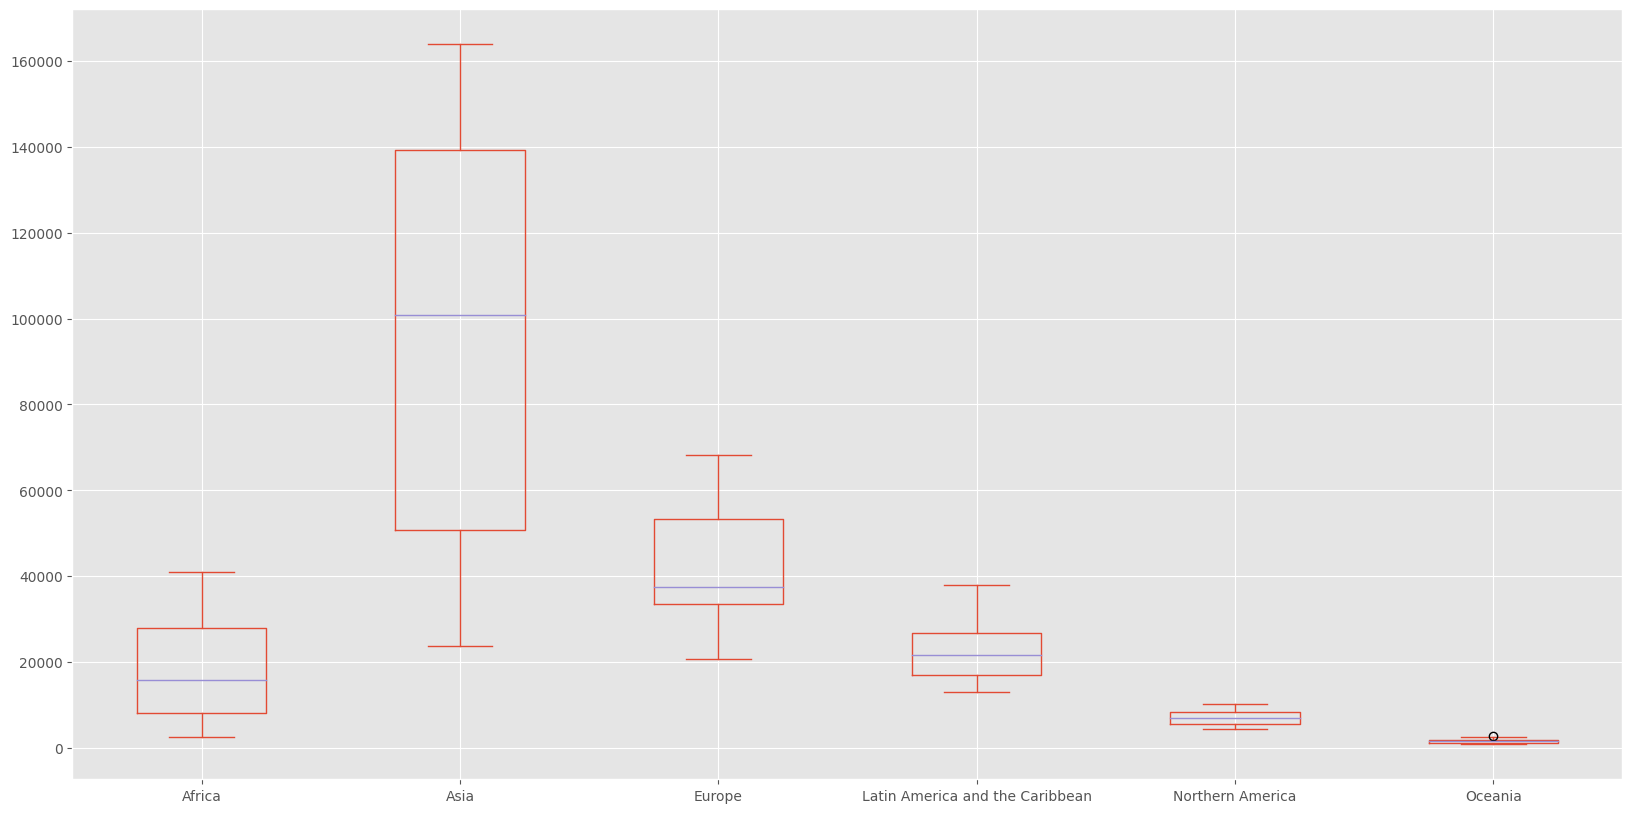

In [37]:
cdf[years].T.plot(kind='box',figsize=(20,10))